In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\\Users\\EDET\\Desktop\\programming\\dataset\\fifa data.csv')

In [3]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
print(f'the size of the dataframe is {df.size}')
print(f'the shape of the dataframe is {df.shape}')

the size of the dataframe is 1900912
the shape of the dataframe is (18278, 104)


In [5]:
numerics = ['int64', 'float64']

print("Number of numberic attributes : " + str(len(df.select_dtypes(include=numerics).columns)))
print("Number of categorical attributes : " + str(len(df.select_dtypes(include=['object']).columns)))

Number of numberic attributes : 61
Number of categorical attributes : 43


In [6]:
#Reseting the index to start from 1 instead of zero(0)
df.index = np.arange(1,len(df)+1)

In [7]:
#Looking at the first 5 rows
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [8]:
#Looking at the last 5 rows
df.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18274,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18275,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18276,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18277,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18278,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [9]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18278 entries, 1 to 18278
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.6+ MB


## *Exploratory Data Analysis*

In [10]:
#Brief descriptive statistic of the numerical features of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sofifa_id,18278.0,219738.864482,27960.200461,768.0,204445.5,226165.0,240795.75,252905.0
age,18278.0,25.283291,4.656964,16.0,22.0,25.0,29.00,42.0
height_cm,18278.0,181.362184,6.756961,156.0,177.0,181.0,186.00,205.0
weight_kg,18278.0,75.276343,7.047744,50.0,70.0,75.0,80.00,110.0
overall,18278.0,66.244994,6.949953,48.0,62.0,66.0,71.00,94.0
...,...,...,...,...,...,...,...,...
goalkeeping_diving,18278.0,16.572765,17.738069,1.0,8.0,11.0,14.00,90.0
goalkeeping_handling,18278.0,16.354853,16.996925,1.0,8.0,11.0,14.00,92.0
goalkeeping_kicking,18278.0,16.212934,16.613665,1.0,8.0,11.0,14.00,93.0
goalkeeping_positioning,18278.0,16.368038,17.136497,1.0,8.0,11.0,14.00,91.0


In [11]:
#Brief descriptive statistics of all the features of the dataset
df.describe(include='all')

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278.000000,18278,18278,18278,18278.000000,18278,18278.000000,18278.000000,18278,18278,...,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,NaN,18278,17354,18218,NaN,6142,NaN,NaN,162,698,...,98,98,98,98,98,96,110,110,110,96
top,NaN,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,NaN,1992-02-29,NaN,NaN,England,FC Barcelona,...,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,NaN,1,11,3,NaN,113,NaN,NaN,1667,33,...,682,636,636,636,682,667,621,621,621,667
mean,219738.864482,NaN,NaN,NaN,25.283291,NaN,181.362184,75.276343,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27960.200461,NaN,NaN,NaN,4.656964,NaN,6.756961,7.047744,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,768.000000,NaN,NaN,NaN,16.000000,NaN,156.000000,50.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,204445.500000,NaN,NaN,NaN,22.000000,NaN,177.000000,70.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,226165.000000,NaN,NaN,NaN,25.000000,NaN,181.000000,75.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,240795.750000,NaN,NaN,NaN,29.000000,NaN,186.000000,80.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**From the descriptive statistic above the following deductions can be made:**
* The average age of the football players is 25yrs, the maximum age is 42yrs while the minimum age is 16yrs. most of the football player(i.e 50%) are 25yrs.
* The maximum height in centimetre of the footballers is 205, while the minimum is 156cm. 50% of the football players are 181cm tall.
* The average weight of the footballers is 75kg, while the maximum and minimum weight are 110kg and 50kg respectively.

In [12]:
for i ,j in enumerate (df.columns):
    print(i,j)

0 sofifa_id
1 player_url
2 short_name
3 long_name
4 age
5 dob
6 height_cm
7 weight_kg
8 nationality
9 club
10 overall
11 potential
12 value_eur
13 wage_eur
14 player_positions
15 preferred_foot
16 international_reputation
17 weak_foot
18 skill_moves
19 work_rate
20 body_type
21 real_face
22 release_clause_eur
23 player_tags
24 team_position
25 team_jersey_number
26 loaned_from
27 joined
28 contract_valid_until
29 nation_position
30 nation_jersey_number
31 pace
32 shooting
33 passing
34 dribbling
35 defending
36 physic
37 gk_diving
38 gk_handling
39 gk_kicking
40 gk_reflexes
41 gk_speed
42 gk_positioning
43 player_traits
44 attacking_crossing
45 attacking_finishing
46 attacking_heading_accuracy
47 attacking_short_passing
48 attacking_volleys
49 skill_dribbling
50 skill_curve
51 skill_fk_accuracy
52 skill_long_passing
53 skill_ball_control
54 movement_acceleration
55 movement_sprint_speed
56 movement_agility
57 movement_reactions
58 movement_balance
59 power_shot_power
60 power_jumping
6

### **Checking for missing values**

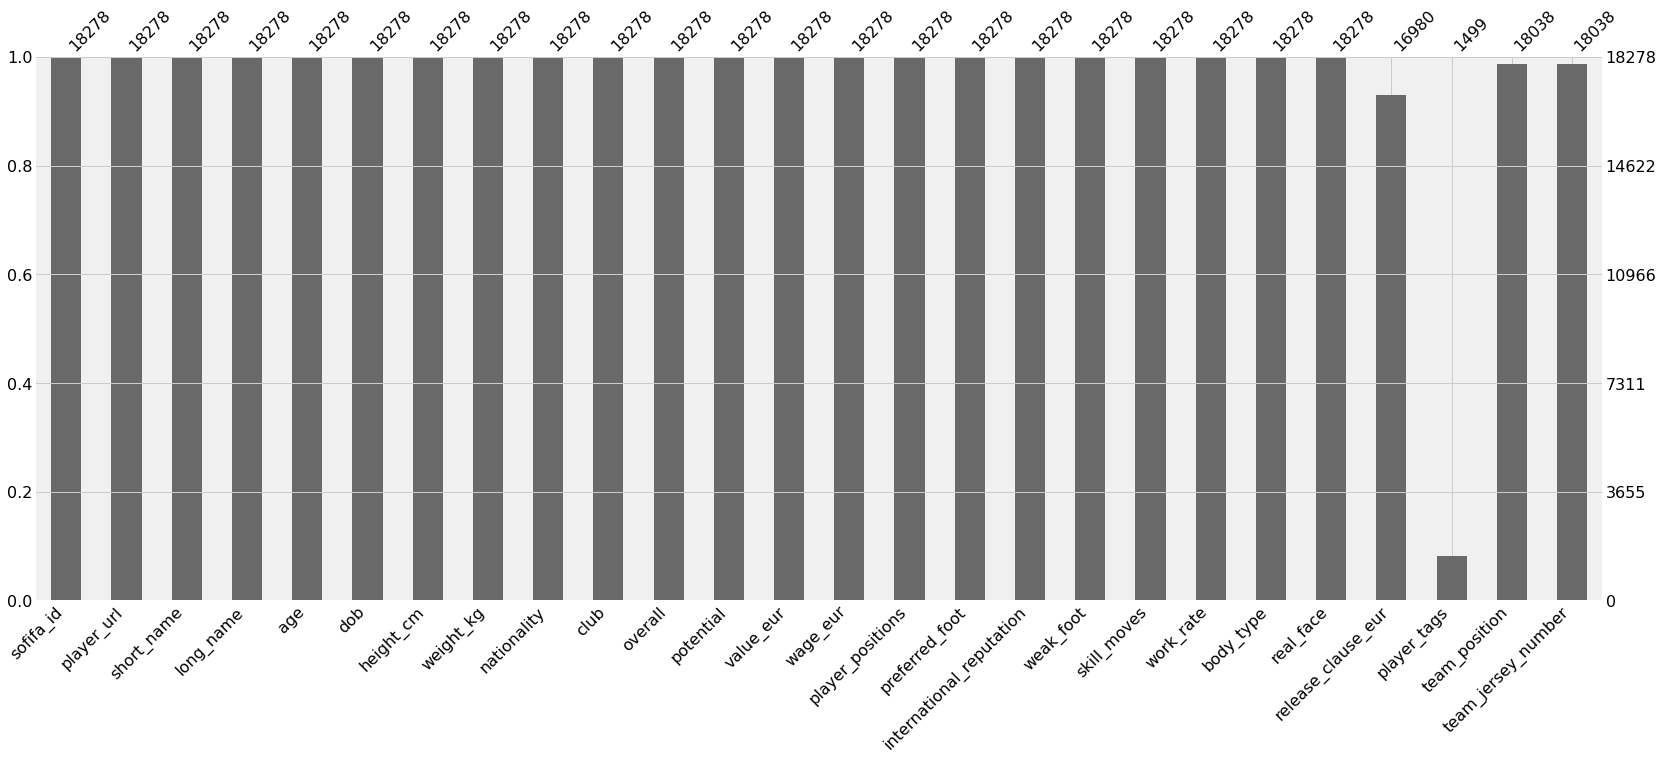

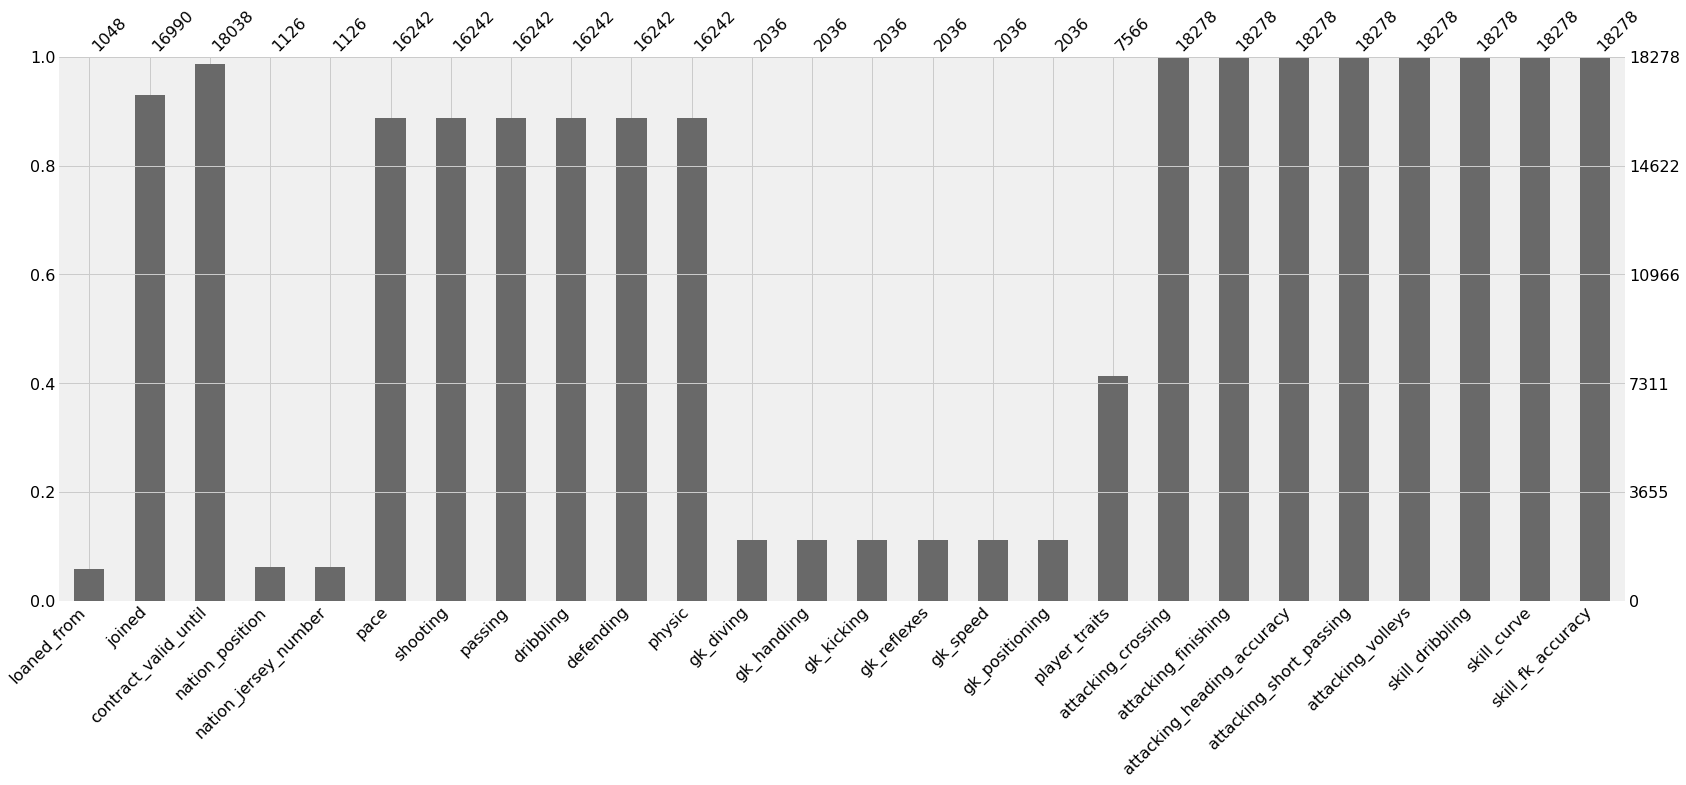

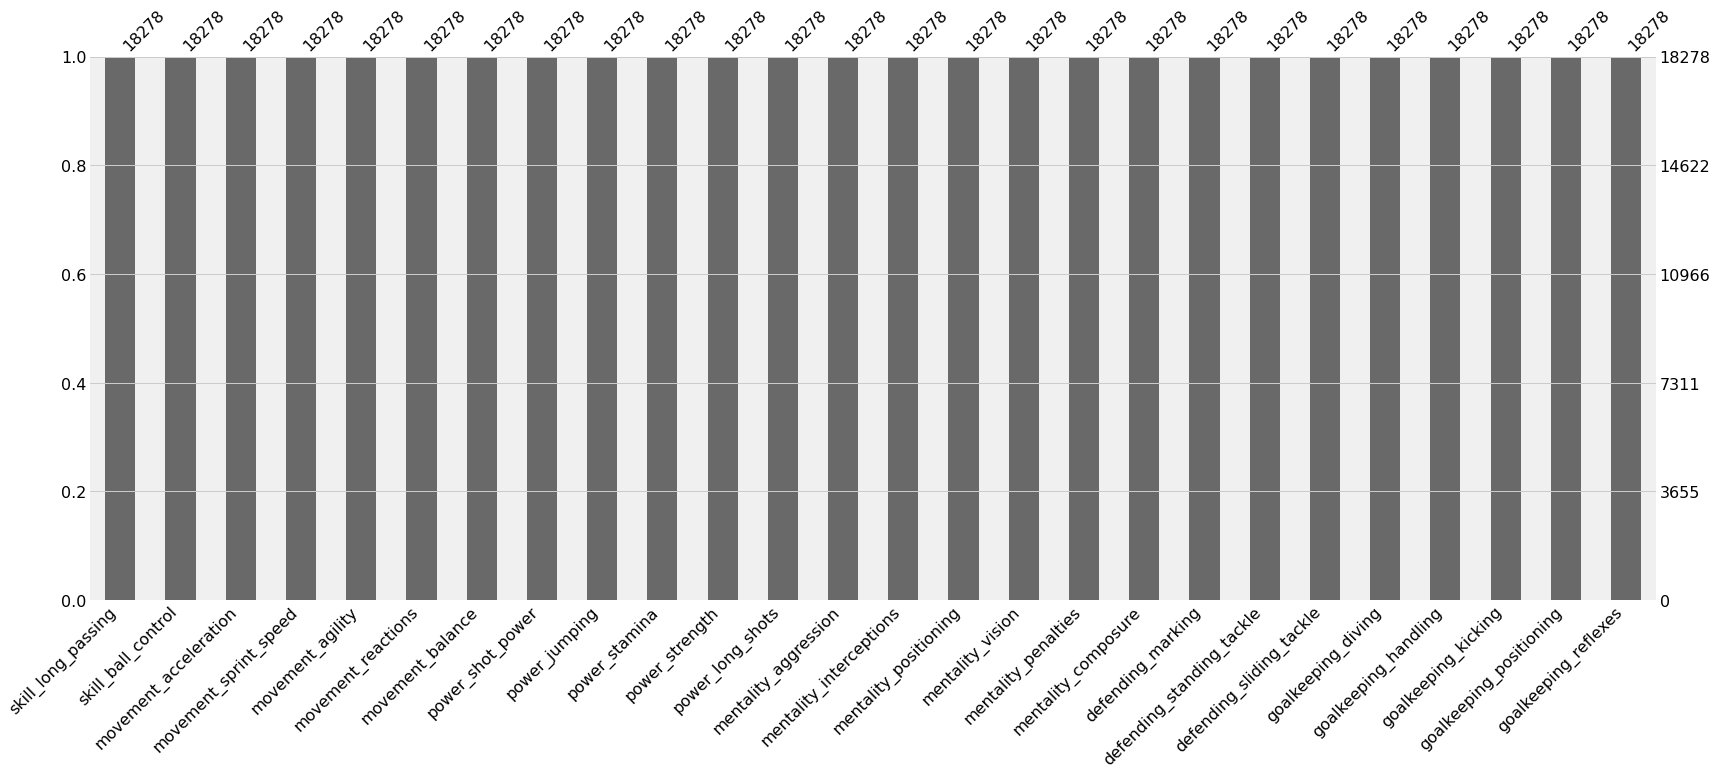

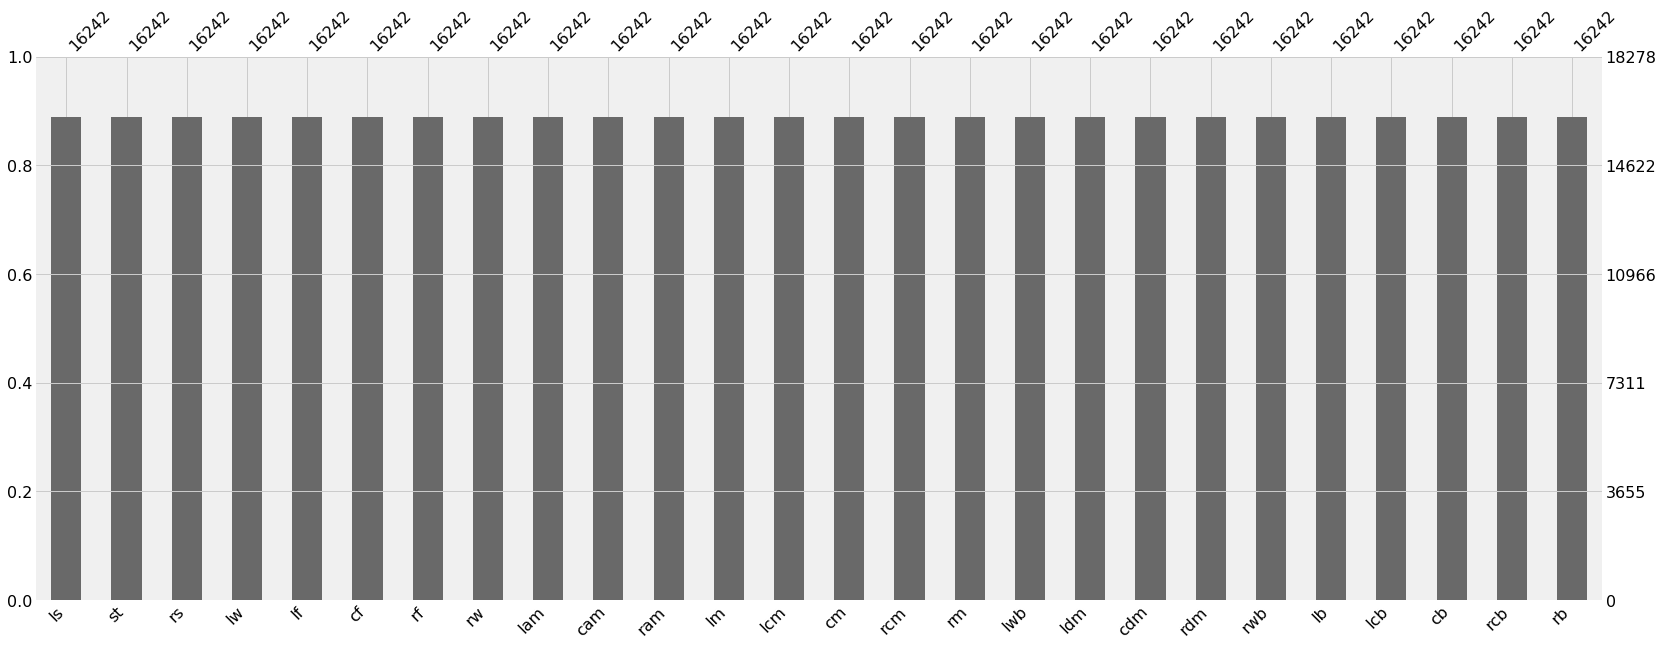

In [14]:
column_groups = np.array_split(df.columns, 4)
for cols in column_groups:
    msno.bar(df[cols])
    plt.show()

Since we have too many columns we plotted the data 4 times.

We can see that, we miss some data in following columns:
- `Club` - as some players can be "free agent" and without the club
- `Jersey Number` - some players might not have a jersey number when they are without he club
- `Joined` - indicates when a player joined the club, not sure why there are a missing values
- `Loaned From` - not every player is on loan somewhere
- `Contract Valid Until` - some players might miss this value, espacially those without the club
- `LS`, `ST`, `RS`, `LW`, `LF`, `CF`, `RW`, `LAM`, `RAM`, `LM`, `LCM`, `CM`, `RCM`, `RM`, `LWB`, `LDM`, `RDM`, `LB`, `LCB`, `RCB`, `RB` - these are the positions that player can play, not sure why these columns are missing some values, we need to examine it
- `Release Clause` - this is ok, some players may have release clause in their contract

### **Histogram distribution of the features**

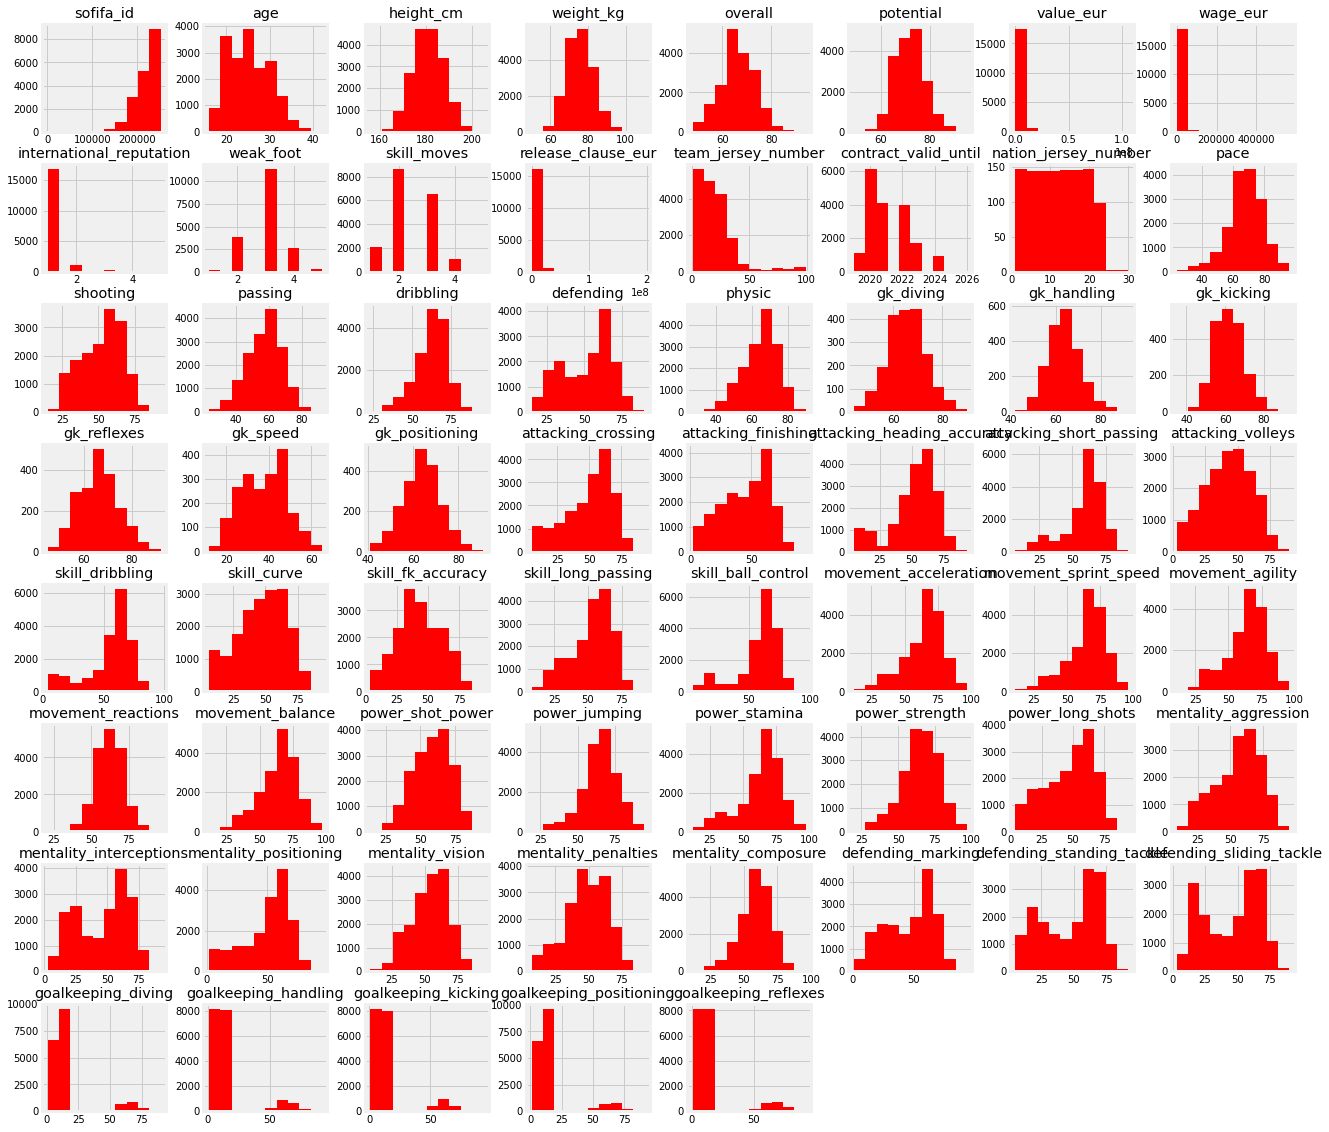

In [15]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca();
df.hist(ax = ax,color='r');

### **Countries with the highest numbers of footballers**

In [3]:
# the first 15 countries with the highest numbers of footballers
df['nationality'].value_counts()[:15]

England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
Brazil                  824
Italy                   732
Colombia                591
Japan                   453
Netherlands             416
China PR                373
Chile                   370
Sweden                  358
Norway                  350
Republic of Ireland     348
Name: nationality, dtype: int64

Text(0.5, 1.0, 'Top 10 countries with the highest numbers of footballers')

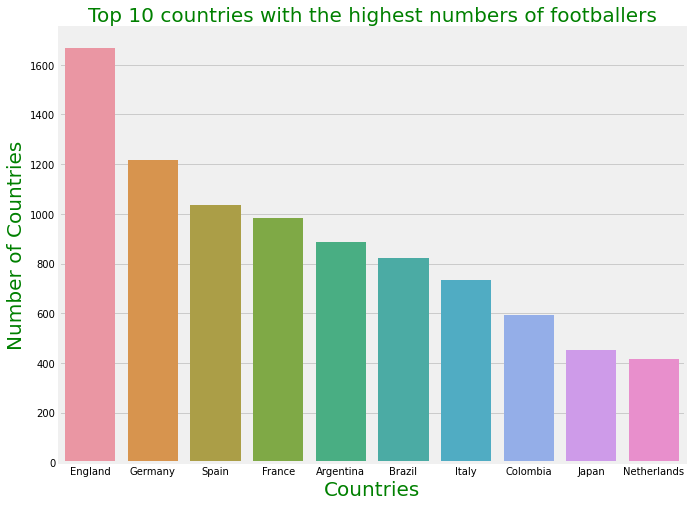

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x=list(df['nationality'].value_counts()[:10].keys()), 
            y=list(df['nationality'].value_counts()[:10]), 
             data=df, orient='v',linewidth=4)
plt.xlabel('Countries', color='g',fontsize=20)
plt.ylabel('Number of Countries', color='g', fontsize=20)
plt.title('Top 10 countries with the highest numbers of footballers', color='g',fontsize=20)

* **England has the highest numbers of football players**

### **Footballer Foot**

Text(0.5, 1.0, 'Most Preferred Foot of the Players')

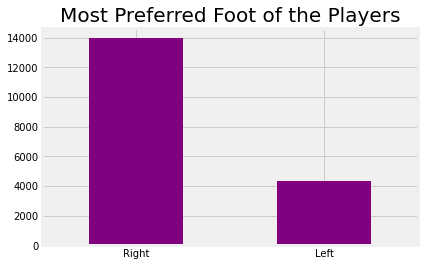

In [18]:
# comparison of preferred foot over the different players

df['preferred_foot'].value_counts().head(100).plot.bar(color = 'purple',rot=0)
plt.title('Most Preferred Foot of the Players', fontsize = 20)

* Most Footballers prefer right to left foot

In [17]:
# Top 10 left footed footballers
df[df['preferred_foot'] == 'Left'][['short_name', 'age', 'club', 'nationality']].head(10)

,short_name,age,club,nationality
0,L. Messi,32,FC Barcelona,Argentina
9,M. Salah,27,Liverpool,Egypt
16,G. Chiellini,34,Juventus,Italy
22,A. Griezmann,28,FC Barcelona,France
23,P. Dybala,25,Juventus,Argentina
25,Ederson,25,Manchester City,Brazil
28,T. Courtois,27,Real Madrid,Belgium
32,H. Lloris,32,Tottenham Hotspur,France
33,David Silva,33,Manchester City,Spain
40,A. Laporte,25,Manchester City,France


In [18]:
# Top 10 Right footed footballers
df[df['preferred_foot'] == 'Right'][['short_name', 'age', 'club', 'nationality']].head(10)

,short_name,age,club,nationality
1,Cristiano Ronaldo,34,Juventus,Portugal
2,Neymar Jr,27,Paris Saint-Germain,Brazil
3,J. Oblak,26,Atlético Madrid,Slovenia
4,E. Hazard,28,Real Madrid,Belgium
5,K. De Bruyne,28,Manchester City,Belgium
6,M. ter Stegen,27,FC Barcelona,Germany
7,V. van Dijk,27,Liverpool,Netherlands
8,L. Modrić,33,Real Madrid,Croatia
10,K. Mbappé,20,Paris Saint-Germain,France
11,K. Koulibaly,28,Napoli,Senegal


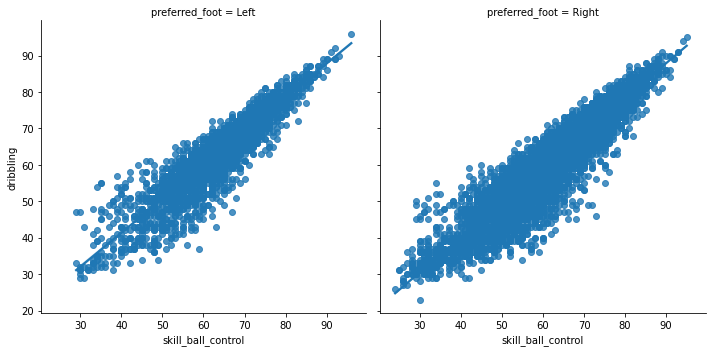

In [19]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing
sns.lmplot(x = 'skill_ball_control', y = 'dribbling', data = df, col = 'preferred_foot')

* left footed football players have more ball control and dribbling skill than right footed players

### **Age distribution**

In [11]:
print(f"The median age is: {df['age'].median()}")
print(f"The mode age is: {df['age'].mode()[0]}")

The median age is: 25.0
The mode age is: 22


* Since the median is greater than it shows that the age distribution is positively skewed


In [12]:
print(f"The skewness of the age is: {df['age'].skew()}")

The skewness of the age is: 0.38061976075931975


<AxesSubplot:title={'center':'Age vs Count'}, xlabel='age', ylabel='count'>

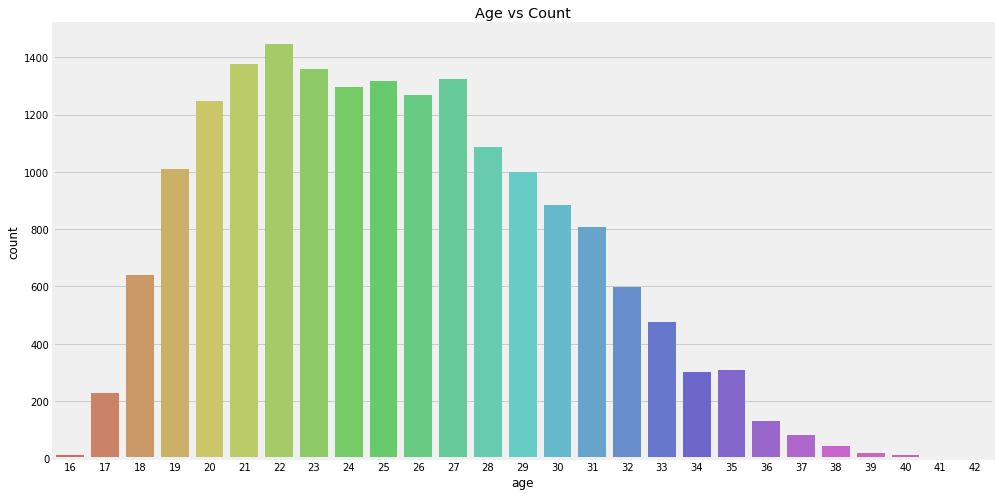

In [19]:
plt.figure(figsize=(15,8))
plt.title("Age vs Count")
sns.countplot(x ='age',data=df, palette='hls')

### **Highest paid footballers**

In [13]:
players_salary = df[['short_name','wage_eur','nationality','club']]
players_salary = players_salary.sort_values(by=['wage_eur'],ascending=False)
players_salary.index = np.arange(1,len(players_salary)+1)
players_salary.head()

,short_name,wage_eur,nationality,club
1,L. Messi,565000,Argentina,FC Barcelona
2,E. Hazard,470000,Belgium,Real Madrid
3,Cristiano Ronaldo,405000,Portugal,Juventus
4,K. De Bruyne,370000,Belgium,Manchester City
5,A. Griezmann,370000,France,FC Barcelona


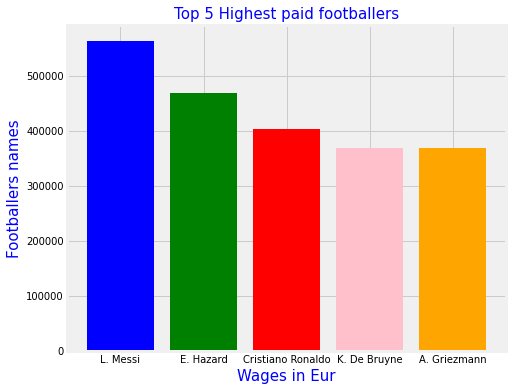

In [21]:
plt.figure(figsize=(7,6))
plt.bar(list(players_salary['short_name'][:5]),list(players_salary['wage_eur'][:5]),color=["blue","green","red","pink","orange"]);
plt.title('Top 5 Highest paid footballers',fontsize=15,color='blue');
plt.xlabel('Wages in Eur',fontsize=15,color='blue');
plt.ylabel('Footballers names',fontsize=15,color='blue');

**The top five highest paid football players are:**
- Lionel Messi
- Eden Hazard
- Christiano Ronaldo
- Kelvin de Bruyne
- Antonio Griezmann

### **Highest paying football clubs**

Text(0, 0.5, 'Average wages in each club')

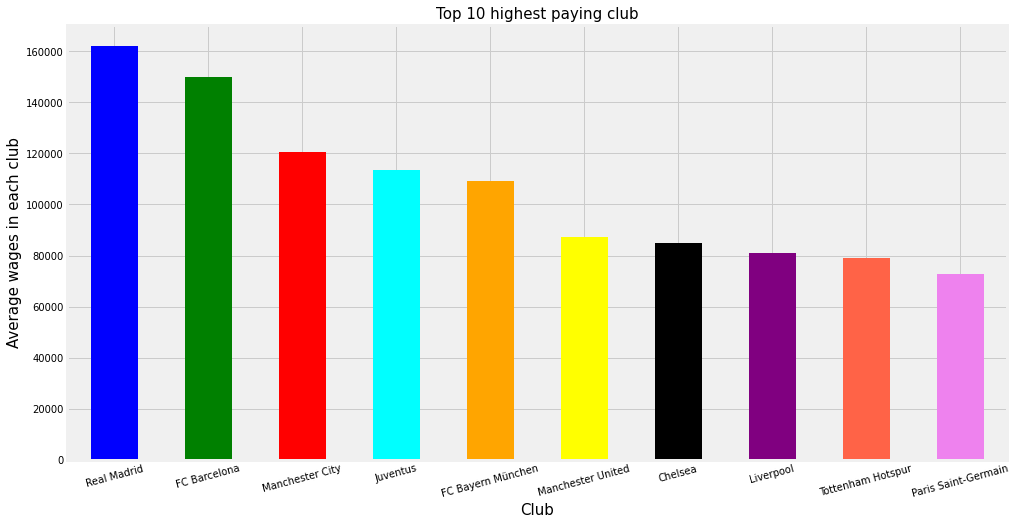

In [22]:
sal = players_salary.groupby(['club'])['wage_eur'].mean().sort_values(ascending=False)[:10]

#sns.barplot(x=players_salary['club'],y=players_salary['wage_eur'],data=players_salary)
fig = plt.figure(figsize = (15,8))
ax = fig.gca();
sal.plot(kind='bar',color=["blue","green","red","cyan","orange","yellow","black","purple","tomato","violet"],rot=15,ax=ax)
plt.title('Top 10 highest paying club',fontsize=15)
plt.xlabel('Club',fontsize=15)
plt.ylabel('Average wages in each club',fontsize=15)

### **Top 10 players who can give best long passes**

In [16]:
df.sort_values(by = 'passing' , ascending = False)[['short_name' , 'club' , 'nationality' , 
                                                     'passing']].head(10)

,short_name,club,nationality,passing
0,L. Messi,FC Barcelona,Argentina,92.0
5,K. De Bruyne,Manchester City,Belgium,92.0
27,C. Eriksen,Tottenham Hotspur,Denmark,90.0
36,T. Kroos,Real Madrid,Germany,90.0
8,L. Modrić,Real Madrid,Croatia,89.0
69,Parejo,Valencia CF,Spain,88.0
33,David Silva,Manchester City,Spain,88.0
375,Cesc Fàbregas,AS Monaco,Spain,87.0
65,M. Pjanić,Juventus,Bosnia Herzegovina,87.0
106,J. Rodríguez,Real Madrid,Colombia,87.0


### **Top 10 players with the best mentality vision**

In [24]:
df.sort_values(by = 'mentality_vision' , ascending = False)[['short_name' , 'club' , 'nationality' , 
                                                     'mentality_vision' ]].head(10)


,short_name,club,nationality,mentality_vision
1,L. Messi,FC Barcelona,Argentina,94
6,K. De Bruyne,Manchester City,Belgium,94
28,C. Eriksen,Tottenham Hotspur,Denmark,92
34,David Silva,Manchester City,Spain,91
9,L. Modrić,Real Madrid,Croatia,91
136,M. Özil,Arsenal,Germany,90
3,Neymar Jr,Paris Saint-Germain,Brazil,90
5,E. Hazard,Real Madrid,Belgium,89
96,H. Ziyech,Ajax,Morocco,89
55,L. Insigne,Napoli,Italy,89


### **Top 10 player who have great shot power**

In [25]:
df.sort_values(by = 'power_shot_power' , ascending = False)[['short_name' , 'club' , 'nationality' , 
                                                     'power_shot_power' ]].head(10)

,short_name,club,nationality,power_shot_power
2,Cristiano Ronaldo,Juventus,Portugal,95
304,A. Kolarov,Roma,Serbia,95
533,Hulk,Shanghai SIPG FC,Brazil,94
101,G. Bale,Real Madrid,Wales,92
6,K. De Bruyne,Manchester City,Belgium,91
13,H. Kane,Tottenham Hotspur,England,90
650,R. Malinovskyi,Atalanta,Ukraine,90
3229,V. Ayala,Gimnasia y Esgrima La Plata,Paraguay,90
206,F. Quagliarella,Sampdoria,Italy,90
25,P. Pogba,Manchester United,France,90


### **Expensive football players.**

In [26]:
df.sort_values(by = 'value_eur' , ascending = False)[['short_name' , 'club' , 'nationality' , 
                                                     'overall' , 'value_eur' , 'wage_eur']].head(10)

,short_name,club,nationality,overall,value_eur,wage_eur
3,Neymar Jr,Paris Saint-Germain,Brazil,92,105500000,290000
1,L. Messi,FC Barcelona,Argentina,94,95500000,565000
11,K. Mbappé,Paris Saint-Germain,France,89,93500000,155000
6,K. De Bruyne,Manchester City,Belgium,91,90000000,370000
5,E. Hazard,Real Madrid,Belgium,91,90000000,470000
13,H. Kane,Tottenham Hotspur,England,89,83000000,220000
10,M. Salah,Liverpool,Egypt,90,80500000,240000
8,V. van Dijk,Liverpool,Netherlands,90,78000000,200000
4,J. Oblak,Atlético Madrid,Slovenia,91,77500000,125000
24,P. Dybala,Juventus,Argentina,88,76500000,215000


Text(0.5, 1.0, 'Top 10 Expensive Footballers')

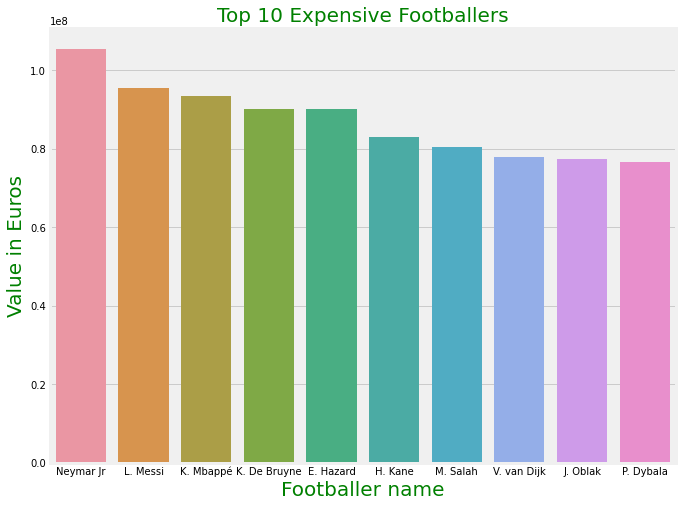

In [27]:
expensive_players = df.sort_values(by = 'value_eur' , ascending = False)[['short_name' , 'club' , 'nationality' , 
                                                     'overall' , 'value_eur' , 'wage_eur']].head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=list(expensive_players['short_name'][:10]), 
            y=list(expensive_players['value_eur'][:10]), 
             data=expensive_players, orient='v',linewidth=4)
plt.xlabel('Footballer name', color='g',fontsize=20)
plt.ylabel('Value in Euros', color='g', fontsize=20)
plt.title('Top 10 Expensive Footballers', color='g',fontsize=20)

Text(0.5, 1.0, 'Average player wages in 15 clubs')

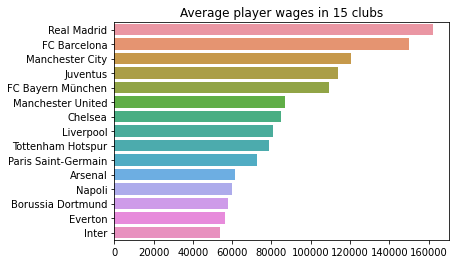

In [22]:
names = list(df.groupby(['club'])['wage_eur'].mean().nlargest(15).keys())
stat = list(df.groupby(['club'])['wage_eur'].mean().nlargest(15))
sns.barplot(y=names,x=stat,data=df,orient='h')
plt.title('Average player wages in 15 clubs')

### **Relationship between Footballer release clause and their value in euro**

<AxesSubplot:xlabel='release_clause_eur', ylabel='value_eur'>

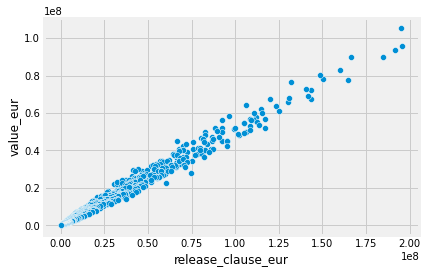

In [28]:
sns.scatterplot(df["release_clause_eur"], df["value_eur"])

from the scatterplot we can deduce that players release clause increases as their value increase
and as such their is a linear relationship between value in euros and release clause

### **Relationship between footballers age and their potential**

<AxesSubplot:xlabel='age', ylabel='potential'>

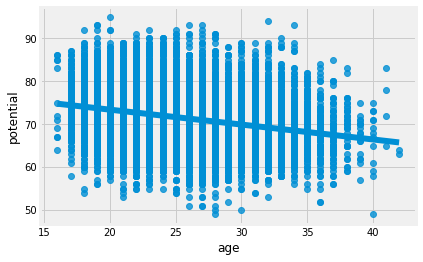

In [29]:
sns.regplot(x='age', y="potential", data=df, 
           )

we can deduce that the potential of a player reduces with increasing age

### **Top 10 players with high shooting power**

In [30]:
player_shooting= df[['short_name','shooting']]
player_shooting.sort_values(by=['shooting'],ascending=False).head(10)

,short_name,shooting
2,Cristiano Ronaldo,93.0
1,L. Messi,92.0
13,H. Kane,91.0
18,S. Agüero,90.0
206,F. Quagliarella,89.0
20,L. Suárez,89.0
97,Z. Ibrahimović,88.0
38,M. Reus,88.0
101,G. Bale,87.0
21,R. Lewandowski,87.0


### **Clubs with the highest numbers of footballers**

In [31]:
# top 20 teams with the highest number of football players

df['club'].value_counts()[:20]

FC Barcelona                33
Real Valladolid CF          33
VfL Wolfsburg               33
Crystal Palace              33
Eintracht Frankfurt         33
Hertha BSC                  33
Leicester City              33
AS Monaco                   33
SC Paderborn 07             33
Sevilla FC                  33
Athletic Club de Bilbao     33
Deportivo Alavés            33
Juventus                    33
Udinese                     33
Watford                     33
Bournemouth                 33
Lecce                       33
Borussia Mönchengladbach    33
FC Nantes                   33
Newcastle United            33
Name: club, dtype: int64

### **Youngest Football players**

In [33]:
# top 15 youngest players, their name, club and nationality

youngest = df.sort_values('age', ascending = True)[['short_name', 'age', 'club', 'nationality']].head(15)
youngest

,short_name,age,club,nationality
18172,J. Starbuck,16,Grimsby Town,England
4765,A. Hložek,16,Sparta Praha,Czech Republic
18244,E. Sartorius,16,Lincoln City,England
17828,D. Burns,16,St. Patrick's Athletic,Northern Ireland
17615,D. Obbekjær,16,Odense Boldklub,Denmark
17783,S. Anderson,16,Colorado Rapids,United States
18243,R. Wikberg,16,Östersunds FK,Sweden
18032,O. Stefánsson,16,IFK Norrköping,Iceland
14627,A. Velasco,16,Independiente,Argentina
12161,S. Esposito,16,Inter,Italy


### **Eldest football players**

In [34]:
# top 15 eldest players, their name, club and nationality
eldest = df.sort_values('age', ascending = False)[['short_name', 'age', 'club', 'nationality']].head(15)
eldest

,short_name,age,club,nationality
13004,H. Sulaimani,42,Al Ahli,Saudi Arabia
11833,C. Muñoz,42,CD Universidad de Concepción,Argentina
201,G. Buffon,41,Juventus,Italy
3707,C. Lucchetti,41,Atlético Tucumán,Argentina
10666,F. Kippe,41,Lillestrøm SK,Norway
869,Hilton,41,Montpellier HSC,Brazil
2966,Cifuentes,40,Cádiz CF,Spain
15813,M. Gurski,40,SpVgg Unterhaching,Germany
8360,F. Cubero,40,Vélez Sarsfield,Argentina
2964,D. Dainelli,40,Livorno,Italy


### **Footballers from england**

In [44]:
eng_players = england[['short_name','wage_eur']].sort_values(by=['wage_eur'],ascending=False)

In [45]:
eng_players.index = np.arange(1,len(eng_players)+1)

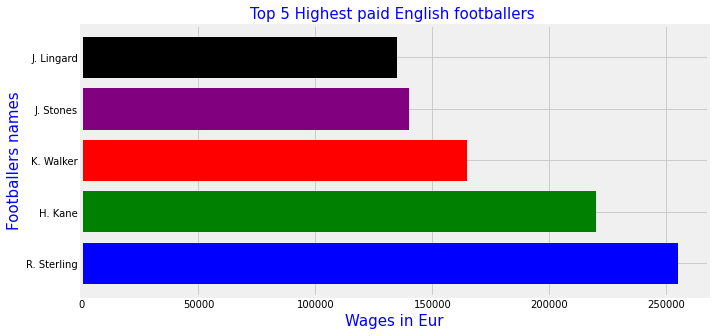

In [46]:
plt.figure(1 , figsize = (10 , 5))
plt.barh(list(eng_players['short_name'][:5]),list(eng_players['wage_eur'][:5]),color=["blue","green","red","purple","black"]);
plt.title('Top 5 Highest paid English footballers ',fontsize=15,color='blue');
plt.xlabel('Wages in Eur',fontsize=15,color='blue');
plt.ylabel('Footballers names',fontsize=15,color='blue');

### **Footballers overall ratings**

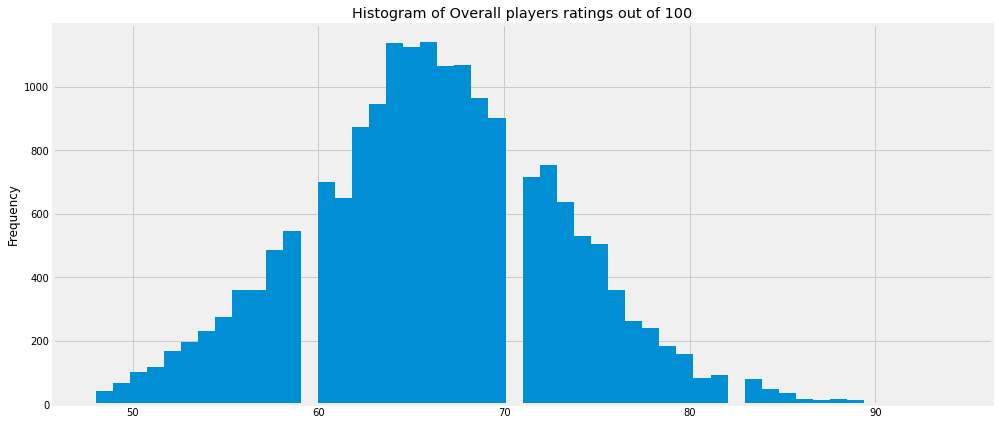

In [49]:
plt.figure(1 , figsize = (15 , 7))
df['overall'].plot(kind = 'hist' , bins = 50 )
plt.title('Histogram of Overall players ratings out of 100')
plt.show()

In [50]:
 def bar_plot( x = None, y = None, data = None ,x_tick_rotation = None ,xlabel = None , ylabel = None , title = ''):
        ax = sns.barplot(x = x , y = y , data = data , palette = 'coolwarm')
        rects = ax.patches
        for rect , label in zip(rects , data[y]):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height + (height * 0.1 /100), round(label,1),
                    ha='center', va='bottom')
        if not xlabel == None and not ylabel == None:
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
        if not x_tick_rotation == None:
            plt.xticks(rotation = x_tick_rotation)
        plt.title(title)

(87.0, 95.0)

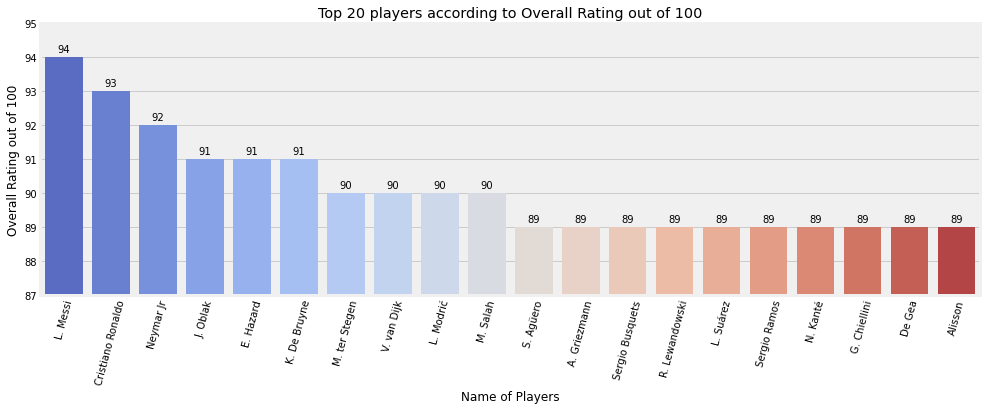

In [51]:
df_best_players = pd.DataFrame.copy(df.sort_values(by = 'overall' , 
                                                   ascending = False ).head(20))

plt.figure(1 , figsize = (15 , 5))
bar_plot(x ='short_name' , y = 'overall' , data = df_best_players , 
              x_tick_rotation = 75 , xlabel = 'Name of Players' , 
              ylabel = 'Overall Rating out of 100' ,
               title = 'Top 20 players according to Overall Rating out of 100')
plt.ylim(87 , 95)

**Lionel messi has the highest overall rating.Showing that he is the G.O.A.T (Greatest Of All Time)😊**

### **The longest membership in a club**


In [54]:
import datetime

now_ = datetime.datetime.now()
df['join_year'] = df.joined.dropna().map(lambda x: x.split('-')[0])
df['Years_of_membership'] = (df.join_year.dropna().map(lambda x: now_.year - int(x))).astype('int')
membership = df[['short_name', 'club', 'Years_of_membership']].sort_values(by = 'Years_of_membership', ascending = False).head(15)
membership.set_index('short_name', inplace=True)
membership

,club,Years_of_membership
short_name,,
M. Al Shalhoub,Al Hilal,23.0
H. Sogahata,Kashima Antlers,23.0
M. Wölfli,BSC Young Boys,21.0
C. Källqvist,BK Häcken,21.0
Y. Endo,Gamba Osaka,20.0
F. Kippe,Lillestrøm SK,19.0
I. Akinfeev,PFC CSKA Moscow,19.0
D. Lewington,Milton Keynes Dons,19.0
Y. Kurihara,Yokohama F. Marinos,19.0


<AxesSubplot:ylabel='club'>

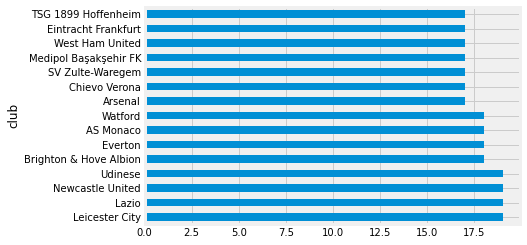

In [59]:
# visualizing clubs with highest number of footballer from different countries
df.groupby(df['club'])['nationality'].nunique().sort_values(ascending = False).head(15).plot(kind='barh')

In [60]:
# visualizing clubs with lowest number of footballers from different countries
df.groupby(df['club'])['nationality'].nunique().sort_values(ascending = True).head(15)

club
Śląsk Wrocław       1
Internacional       1
Botafogo            1
Lyngby BK           1
Bolivia             1
Mexico              1
Cork City           1
New Zealand         1
Northern Ireland    1
India               1
Bahia               1
Avaí FC             1
Austria             1
Australia           1
Peru                1
Name: nationality, dtype: int64